# Taller Evaluado de Aprendizaje No Supervisado
## Minería de Datos 2019

### 1.- Selección y Descripción de Datos  

**1.1**- Descargue los 4 csv de la sección 5 del aula virtual (mismo lugar donde encontró este archivo). Cada CSV contiene una lista de reproducción de canciones de spotify:
* Dinner: canciones para cenar o para poner en un restaurant
* Sleep: canciones que promueven el sueño
* Party: canciones ideales para el baile
* Workout: canciones para hacer ejercicio

Cada canción tiene un hash único para identificarla en spotify (id), un nombre y el artista correspondiente. El resto de las features (características) las puede ver directamente de la [página de desarrolladores de spotify](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)


**PREGUNTA**: Escriba aquí una tabla markdown con una explicación corta de cada feature.

- id: Id unico que utiliza spotify en su BD
- tempo: Beats por minuto promedio
- valence: valor de positividad (felicidad) de la cancion en un rango de 0.0 a 1.0
- speechiness: detecta la presencia de lirica en la canción desde 0.0 a 1.0
- loudness: qué tan fuerte suena en decibeles (db) desde -60 a 0
- liveness: la presencia de audiencia en la canción desde 0.0 a 1.0
- instrumentalness: detecta el contenido vocal de la cancion desde 0.0 a 1.0
- energy: detecta intensidad, ruido, actividad, rapidez en la canción desde 0.0 a 1.0
- Danceability: qué tan bailable es la cancion en cuanto a tempo, ritmo, etc. desde 0.0 a 1.0
- acousticness: Qué tan acustica es la canción desde 0.0 a 1.0
- time_signature: tiempo estimado que dura la canción
- mode: detecta si la canción está en modo mayor o menor
- key: representa en qué acorde (?) está la canción se representa con un entero.
- duration_ms: duracion en milisegundos

**1.2**- Cargue cada playlist en un DataFrame pandas. Agregue una columna indicando al **playlist** que pertenece. Concatene todas las playlist en un solo dataframe. Verifique que su dataset tenga sentido.

**RECUERDE:**
* Elimine todos los samples (muestras) que tengan valores NaN (o impútelos si es valiente)
* Verifique que los índices del nuevo DataFrame estén correctos
* Imprima las estadísticas básicas de su dataset (media, varianza, máximos y mínimos) y su cabecera y cola para verificar el contenido

In [1]:
import pandas as pd
import numpy as np
dinner= pd.read_csv("dinner_track.csv")
party= pd.read_csv("party_track.csv")
sleep= pd.read_csv("sleep_track.csv")
workout= pd.read_csv("workout_track.csv")
dinner['playlist']="dinner"
party['playlist']="party"
sleep['playlist']="sleep"
workout['playlist']="workout"
workout.shape

(363, 18)

In [2]:
modifiedWorkout=workout.dropna()
modifiedSleep=sleep.dropna()
modifiedParty=party.dropna()
modifiedDinner=dinner.dropna()

**PREGUNTA**: Si aprendieramos automáticamente la variable **playlist**, ¿qué problema de la vida real estariamos resolviendo? ¿Cree usted que será posible deducir esta variable a partir de los otros datos numéricos (hipótesis)?

*Si pudiéramos deducir esta varible, seriamos capaces de clasificar precisa y automáticamente la música basada en los estados de ánimo de las personas*

In [3]:
Datos=pd.concat([modifiedWorkout,modifiedParty,modifiedSleep,modifiedDinner], ignore_index=True)
print(Datos.shape)
Datos

(1476, 18)


,id,name,uri,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,playlist
0,6or1bKJiZ06IlK0vFvY75k,Rap God,spotify:track:6or1bKJiZ06IlK0vFvY75k,"Eminem,",0.3980,0.708,363521,0.843,0.000000,7,0.7930,-2.678,1,0.3050,148.164,4.0,0.641,workout
1,5YEOzOojehCqxGQCcQiyR4,Panda,spotify:track:5YEOzOojehCqxGQCcQiyR4,"Desiigner,",0.0231,0.576,246761,0.777,0.000000,10,0.3660,-5.035,0,0.4580,145.200,4.0,0.251,workout
2,6JyuJFedEvPmdWQW0PkbGJ,Purple Lamborghini (with Rick Ross),spotify:track:6JyuJFedEvPmdWQW0PkbGJ,"Skrillex, Rick Ross,",0.0019,0.457,215510,0.899,0.000000,10,0.8310,-2.591,0,0.1320,147.268,4.0,0.298,workout
3,2Vo3sVSCltAaYU1u0f9ASz,Chill Bill REMIX,spotify:track:2Vo3sVSCltAaYU1u0f9ASz,"Rob $tone, D.R.A.M., Denzel Curry, Cousin Stizz,",0.0336,0.828,242653,0.490,0.000027,11,0.0867,-9.278,1,0.0593,107.968,4.0,0.282,workout
4,3U8Ev1gISsx6O1uwpsttOD,Mercy.1,spotify:track:3U8Ev1gISsx6O1uwpsttOD,"Kanye West, Big Sean, Pusha T, 2 Chainz,",0.0450,0.731,326347,0.624,0.000034,6,0.3050,-5.761,0,0.3110,140.131,4.0,0.521,workout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,7vWSEWnBtWb48R7gJ6qngk,Fighter Girl,spotify:track:7vWSEWnBtWb48R7gJ6qngk,"Mason Jennings,",0.4650,0.557,200187,0.647,0.000002,1,0.1230,-6.365,1,0.0295,77.057,4.0,0.548,dinner
1472,0FrCdLSwmmmu3iUxfj2VbZ,Tuck the Darkness In,spotify:track:0FrCdLSwmmmu3iUxfj2VbZ,"Bowerbirds,",0.6890,0.617,290147,0.433,0.254000,7,0.1170,-9.452,1,0.0288,109.979,4.0,0.301,dinner
1473,37cKyb3sDEt5hRSpBdsrns,Swing Lo Magellan,spotify:track:37cKyb3sDEt5hRSpBdsrns,"Dirty Projectors,",0.8250,0.738,157800,0.366,0.000027,5,0.1180,-10.231,0,0.0324,101.031,4.0,0.504,dinner
1474,19n9s9SfnLtwPEODqk8KCT,Live And Die,spotify:track:19n9s9SfnLtwPEODqk8KCT,"The Avett Brothers,",0.1130,0.591,271187,0.746,0.000000,11,0.1510,-5.054,1,0.0285,117.807,4.0,0.611,dinner


### 2- Reducción de Dimensionalidad y Visualización

**2.1**- Compute la matriz de correlaciones del DataFrame (sólo valores numéricos) y presentela gráficamente como un mapa de calor. Haga una selección de 5 características que le parezcan interesantes y presente su matriz de covarianza en el mismo formato.

In [4]:
Datos.columns

Index(['id', 'name', 'uri', 'artist', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'playlist'],
      dtype='object')

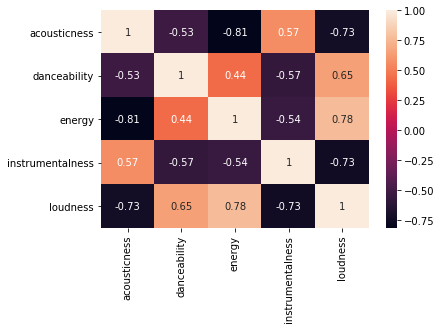

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
x=Datos[['acousticness','danceability','energy','instrumentalness','loudness']]
corrmatrix=x.corr()
sns.heatmap(corrmatrix, annot=True)

**PREGUNTA**: Al hacer la selección usted aprendió algo de los datos (patrón, tendencia, repetición, etc.). Explique brevemente lo que usted conjetura o cree respecto a los datos.

Se puede notar que loudness tiene directa relación con energy y danceability, lo cual es lo esperado ya que mientras más fuerte suene la canción es más enérgica.
Además podemos notar que lo instrumental no tiene directa relacion con danceability ni energía ya que lo instrumental es más calmado.

**2.2**- Utilice seaborn para gráficar las proyecciones 2D de los datos en estas 5 dimensiones. Agregue la variable playlist como descriptor de color de los puntos.

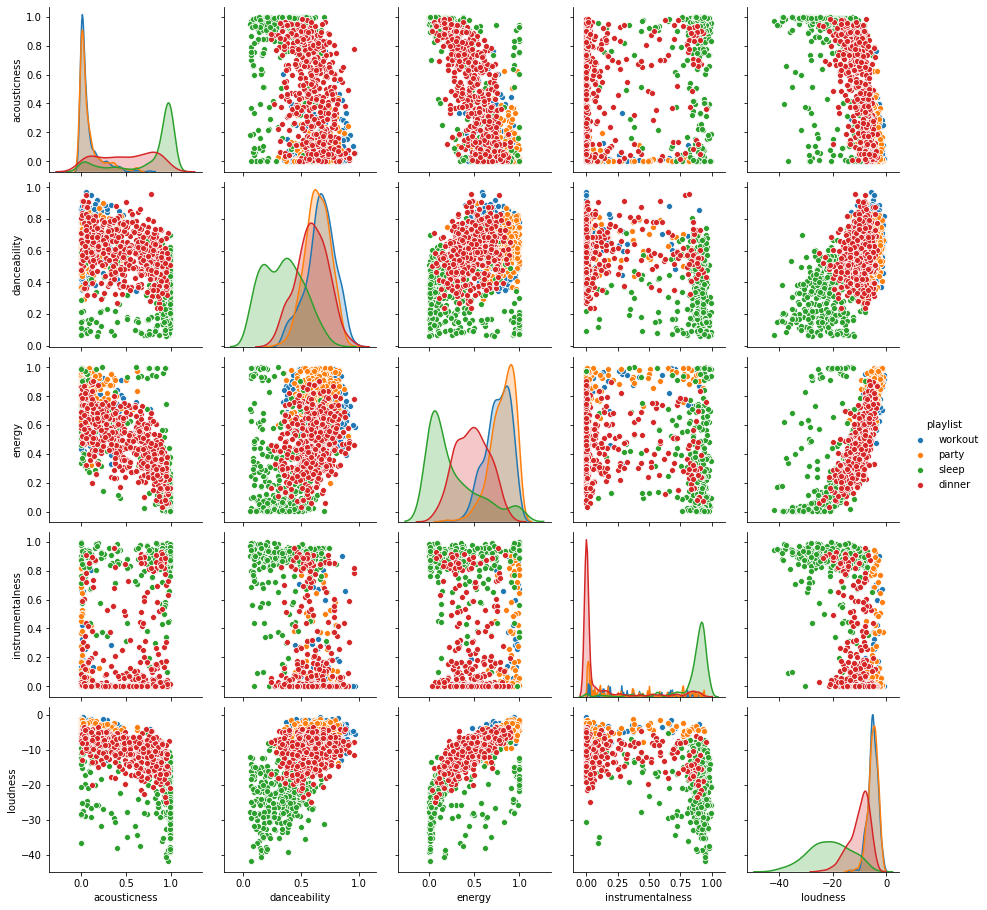

In [6]:
fivedim=pd.concat([x, Datos[['playlist']]], axis = 1)
multidimension=sns.pairplot(fivedim, hue='playlist')

**PREGUNTA**: ¿Puede sacar alguna conclusión ya de los datos seleccionados?

Se puede concluir con respecto al gráfico que la playlist de sleep se diferencia bastante de las otras playlists, ya que probablemente tenga canciones con modalidad más tranquila que las demás, en base a las features que se han seleccionado.

**2.3**- Aplique el Análisis de Componentes Principales considerando 5 componentes. Grafique las proyecciones 2D de las 5 dimensiones PCA con la variable playlist como descriptor de color de los puntos. Además, indique cuanto de la varianza se explica con estas 5 dimensiones.

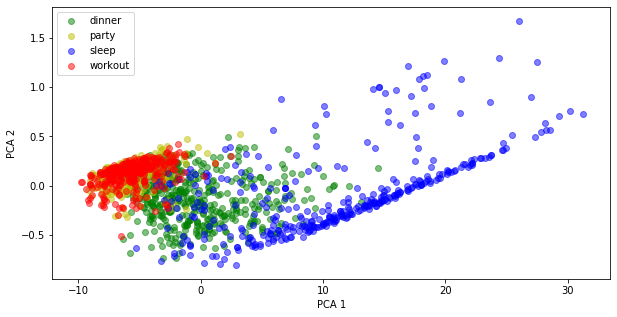

In [7]:
from sklearn import decomposition

playlists = fivedim['playlist']
songs = np.array(fivedim.drop(labels= ['playlist'],axis=1))
songs_colors = {'sleep': 'b', 'dinner': 'g', 'workout': 'r', 'party': 'y'}

pca = decomposition.PCA(n_components=2)
pca.fit(songs)
song_pca = pca.transform(songs)

# projected coordinates
fig, ax = plt.subplots(figsize = (10, 5))
for playlist in np.unique(playlists):
    mask = (playlists == playlist)
    ax.scatter(song_pca[mask][:, 0], song_pca[mask][:, 1], label = playlist, c = songs_colors[playlist], alpha = 0.5)

# loading vectors

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.legend();

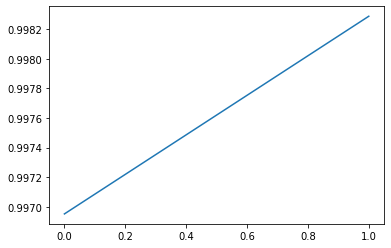

In [8]:
pca_model = decomposition.PCA(n_components = 2)
pca_model.fit(x)
mnist_pca = pca_model.transform(x)
plt.plot(pca_model.explained_variance_ratio_.cumsum())

Podemos notar que se explica la mayor parte de los datos con esas 5 dimensiones

**PREGUNTA**: ¿Cuál representación de 5 dimensiones tiene mayor potencial para clustering según usted? Fundamente y utilice esta representación desde ahora en adelante. 

**2.4**- Visualice la representación seleccionada con t-SNE de 2 dimensiones. Pruebe con al menos 3 valores de perplejidad.

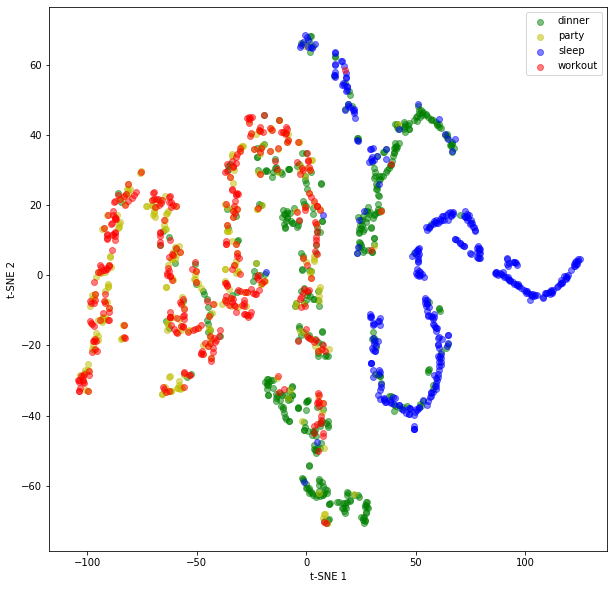

In [9]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components = 2, init = 'pca', perplexity = 10)
spotify_tsne = tsne_model.fit_transform(x)

fig, ax = plt.subplots(figsize = (10, 10), sharex = True)
for playlist in np.unique(playlists):
    mask = (playlists == playlist)
    ax.scatter(spotify_tsne[mask][:, 0], spotify_tsne[mask][:, 1], label = playlist, c = songs_colors[playlist], alpha = 0.5)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.legend();

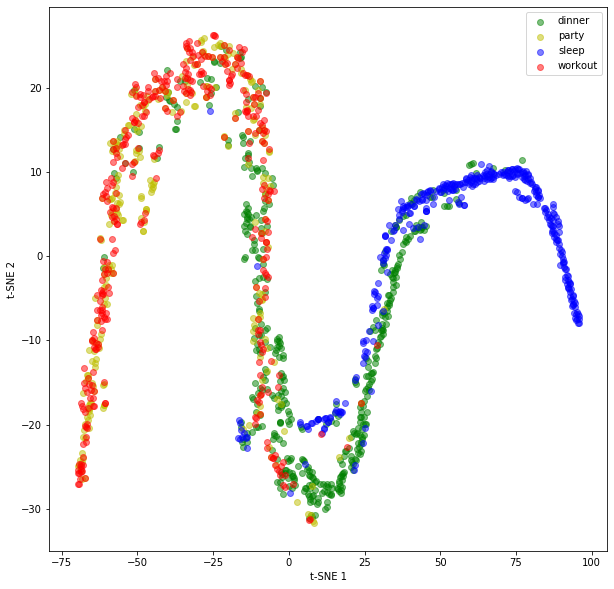

In [10]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components = 2, init = 'pca', perplexity = 30)
spotify_tsne = tsne_model.fit_transform(x)

fig, ax = plt.subplots(figsize = (10, 10), sharex = True)
for playlist in np.unique(playlists):
    mask = (playlists == playlist)
    ax.scatter(spotify_tsne[mask][:, 0], spotify_tsne[mask][:, 1], label = playlist, c = songs_colors[playlist], alpha = 0.5)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.legend();

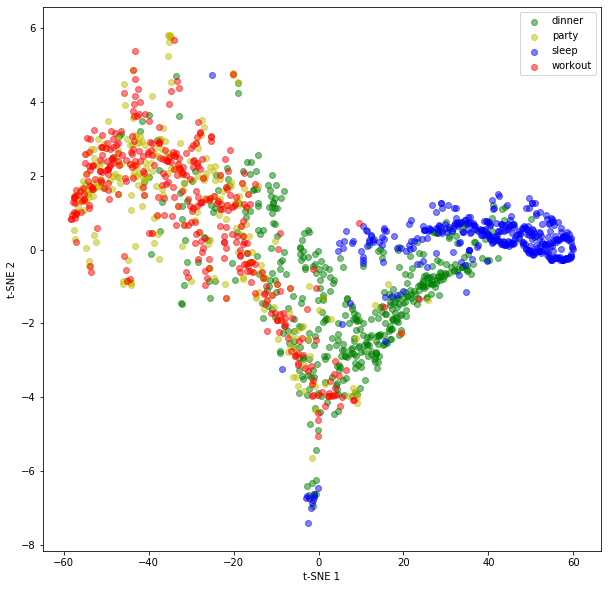

In [11]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components = 2, init = 'pca', perplexity = 75)
spotify_tsne = tsne_model.fit_transform(x)

fig, ax = plt.subplots(figsize = (10, 10), sharex = True)
for playlist in np.unique(playlists):
    mask = (playlists == playlist)
    ax.scatter(spotify_tsne[mask][:, 0], spotify_tsne[mask][:, 1], label = playlist, c = songs_colors[playlist], alpha = 0.5)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.legend();

**PREGUNTA**: ¿Considera usted que t-SNE ayuda en este caso? Indique cual es el efecto del parámetro perplejidad con 

*Al aumentar el parámetro de perplejidad podemos notar una tendencia hacia formas más claras de cómo se separan los datos, aunque al aumentar demasiado la perplejidad (valores mayores a 50) podemos notar anomalías en el algoritmo, el cual da como resultado una superposición de los datos.*


### 3- Clustering 
**3.1** Aplique al menos dos algoritmos de clustering. Si el algoritmo lo requiere, fije la cantidad de clusters a 4 (cantidad real de playlist). 

#### Primero se aplica Kmeans

In [12]:
from scipy.spatial import Delaunay, delaunay_plot_2d, Voronoi, voronoi_plot_2d, \
    ConvexHull, convex_hull_plot_2d
from sklearn.cluster import KMeans
from statistics import mode
def dokmeans(X, n_clusters, modellabel, truelabels, colors):
    print(modellabel)
    kmean_model = KMeans(n_clusters = n_clusters, n_init = 10)
    kmean_model.fit(X)
    centers = kmean_model.cluster_centers_
    labels = kmean_model.labels_
    fig, ax = plt.subplots(figsize = (10, 10))
    nwrong = 0
    for label in np.unique(labels):
        mask = (label == labels)
        truelabel = mode(truelabels[mask])
        maskwrong = mask & (truelabels != truelabel)
        nwrong += np.sum(maskwrong)
        ax.scatter(X[mask, 0], X[mask, 1], c = colors[truelabel], alpha = 0.5)
        ax.scatter(X[maskwrong, 0], X[maskwrong, 1], c = colors[truelabel], marker = 'o', s = 200, alpha = 0.5, facecolors = 'None')
    ax.scatter(X[maskwrong, 0], X[maskwrong, 1])
    ax.scatter(centers[:, 0], centers[:, 1], marker = '*', c = 'k', s = 200)
    points = np.array(list(zip(centers[:, 0], centers[:, 1])))
    if len(points) > 3:
        voronoi_plot_2d(Voronoi(points), ax, show_points = False, show_vertices = False, line_width = 5)
    ax.set_xlabel("%s 1" % modellabel)
    ax.set_ylabel("%s 1" % modellabel)
    print("%.3f missclassification fraction" % (1. * nwrong/len(labels)))

### Kmeans con pca

pca
0.397 missclassification fraction


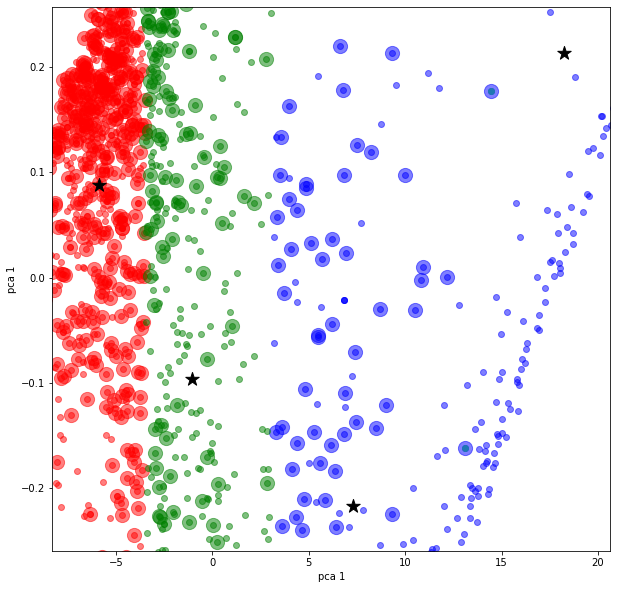

In [13]:
dokmeans(song_pca, 4, 'pca', playlists, songs_colors)

### Kmeans con tsne

tsne
0.400 missclassification fraction


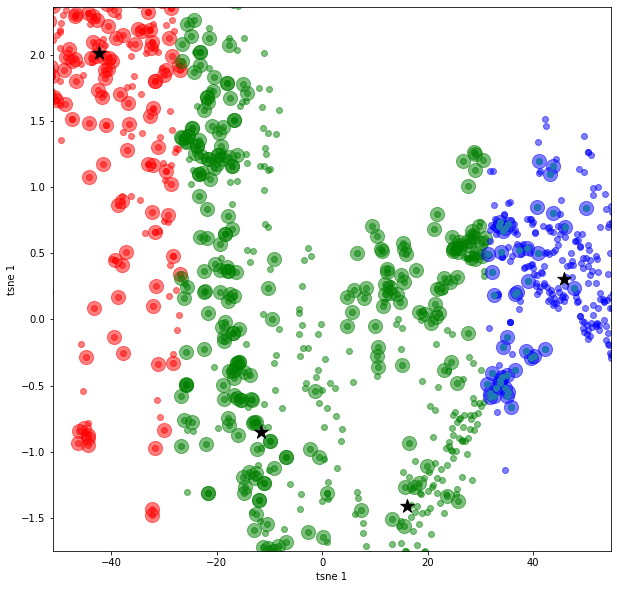

In [14]:
dokmeans(spotify_tsne, 4, 'tsne', playlists, songs_colors)

### Notar que lo anterior tiene la forma Tsne de perplejidad 75

### Luego se aplica Gaussian Mixture

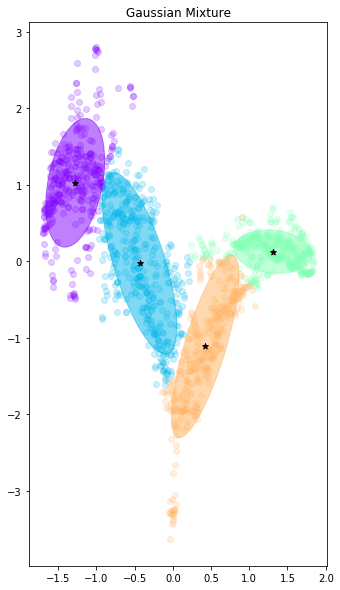

In [15]:
from sklearn import mixture
from scipy import linalg
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler

X = spotify_tsne # mnist_pca mnist_nmf
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(aspect = 1)
    for i, (mean, covar) in enumerate(zip(
            means, covariances)):
        color = cmap(norm(i))
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # show only predicted classes
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], color=color, alpha = 0.2)
        plt.scatter(mean[0], mean[1], c = 'k', zorder = 1000, marker = '*')

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    #plt.xticks(())
    #plt.yticks(())
    plt.title(title)

fig, ax = plt.subplots(figsize = (20, 10))
n_components = 4
GMM_model = mixture.GaussianMixture(n_components = n_components, covariance_type = 'full')
GMM_model.fit(X)
cmap = plt.cm.rainbow
norm = mpl.colors.Normalize(vmin=0, vmax=n_components)

    
plot_results(X, GMM_model.predict(X), GMM_model.means_, GMM_model.covariances_, 0,
             'Gaussian Mixture')

**PREGUNTA**: ¿Qué algoritmo se parece más adecuado cualitativamente? Seleccione este algoritmo para la siguiente pregunta. Tenga presente que comparar cuantitativamente clusters es complejo (muy posible!, pero aún no lo hemos visto).

*Cualitativamente Gaussian Mixture muestra de mejor manera la separación de los datos, ya que se puede notar claramente la separación. En cambio con kmeans, se distinguen solo tres grupos. El cluster fue usado con la ayuda de tsne.*

#### Podemos concluir que la playlist party (naranja) se parece mucho a la playlist workout (azul) esto se puede inferir por tender a ser más animadas. En me dio (verde) tenemos a la playlist dinner, pues es como un estado intermedio ni tan tranquilo ni tan enérgico. Por último tenemos la playlist sleep (violeta) la cual se separa bastante del resto al tender a ser más tranquila al ser para dormir.

**3.2** Revise cuales son y cambie fundadamente el/los parámetros del algoritmo.

Puede cambiarse la dimensionalidad de los datos, tanto como el numero de componentes que se desean estudiar, como se muestra a continuación.

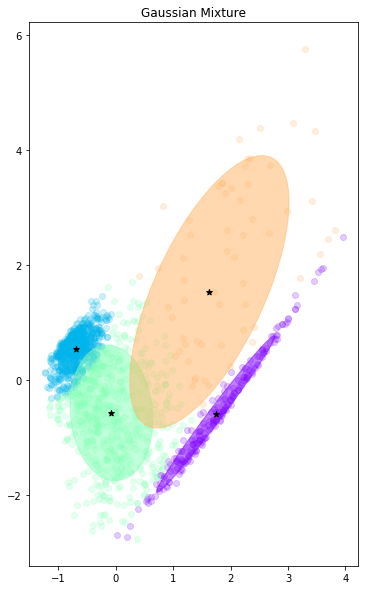

In [16]:
Y = song_pca # mnist_pca mnist_nmf
scaler = StandardScaler()
scaler.fit(Y)
Y = scaler.transform(Y)
fig, ax = plt.subplots(figsize = (20, 10))
n_components = 4
GMM_model = mixture.GaussianMixture(n_components = n_components, covariance_type = 'full')
GMM_model.fit(Y)
cmap = plt.cm.rainbow
norm = mpl.colors.Normalize(vmin=0, vmax=n_components)

    
plot_results(Y, GMM_model.predict(Y), GMM_model.means_, GMM_model.covariances_, 0,
             'Gaussian Mixture')

**PREGUNTA**: fundamente su elección y explique si funcionó o no.

Se puede apreciar claramente cómo se diferencian los clusters uno de otro, por lo que Gaussian mixture parece ser un modelo acertado para el problema.

**3.3** Seleccione un representante adecuado para cada cluster, y haga una tabla con los nombres de las canciones y sus respectivos artistas.

In [17]:
print(Datos.iloc[160])

id                                         4c7mwtU8HGuLUVqRX5HU7F
name                                             F**kin' Problems
uri                          spotify:track:4c7mwtU8HGuLUVqRX5HU7F
artist              A$AP Rocky, Drake, 2 Chainz, Kendrick Lamar, 
acousticness                                               0.0173
danceability                                                0.854
duration_ms                                                237187
energy                                                      0.703
instrumentalness                                          2.4e-06
key                                                             1
liveness                                                    0.109
loudness                                                   -7.127
mode                                                            1
speechiness                                                 0.285
tempo                                                      95.957
time_signa

In [18]:
print(Datos.iloc[1200])

id                                1KlDcHrlDPUJJPmMup3tUp
name                                        5 Years Time
uri                 spotify:track:1KlDcHrlDPUJJPmMup3tUp
artist                              Noah And The Whale, 
acousticness                                       0.335
danceability                                         0.8
duration_ms                                       214920
energy                                             0.559
instrumentalness                                       0
key                                                    0
liveness                                           0.148
loudness                                           -7.11
mode                                                   1
speechiness                                        0.116
tempo                                            121.967
time_signature                                         4
valence                                             0.79
playlist                       

In [19]:
print(Datos.iloc[600])

id                                      2xg8KF2BrxW70v13Twxw6J
name                              Weekend - East & Young Remix
uri                       spotify:track:2xg8KF2BrxW70v13Twxw6J
artist              Louis The Child, Icona Pop, East & Young, 
acousticness                                              0.01
danceability                                             0.834
duration_ms                                             251565
energy                                                   0.674
instrumentalness                                       3.4e-05
key                                                          0
liveness                                                0.0555
loudness                                                -4.476
mode                                                         1
speechiness                                             0.0659
tempo                                                  126.034
time_signature                                         

In [20]:
print(Datos.iloc[1000])

id                                11N5j12dwsKRZvhVxqgQ5y
name                      2 Arabesques: No. 1 in E Major
uri                 spotify:track:11N5j12dwsKRZvhVxqgQ5y
artist                  Claude Debussy, Klara Kormendi, 
acousticness                                       0.995
danceability                                       0.336
duration_ms                                       211533
energy                                            0.0688
instrumentalness                                   0.868
key                                                    6
liveness                                          0.0818
loudness                                         -24.691
mode                                                   0
speechiness                                        0.038
tempo                                             62.908
time_signature                                         5
valence                                            0.136
playlist                       

**PREGUNTA FINAL**: cual es su veredicto (tesis) en contraste con lo escrito en el punto 1.2. 

*Las canciones sí pueden clusterizarse y separarse, pero se necesita un criterio mejor trabajado que lo demostrado en este informe. Por lo que se podrían crear algoritmos de "estados de ánimo" para clasificar canciones y brindar una mejor experiencia al usuario.*